# Bureau of Transportation Statistics

<img src="images/flybynight.jpg"/>

The [Bureau of Transportation Statistics](http://www.rita.dot.gov/bts/about/) 
(BTS) is a statistical agency that is a part of the Research and Innovative 
Technology Administration (RITA). As its name implies, BTS collects and makes 
available transportation data, such as the flights data we will be working with 
in this lab.

- `year`, `month`, `day`: Date of departure
- `dep_time`, `arr_time`: Departure and arrival times, local timezone.
- `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- `carrier`: Two letter carrier abbreviation.
    + `9E`:           Endeavor Air Inc.
    + `AA`:      American Airlines Inc.
    + `AS`:        Alaska Airlines Inc.
    + `B6`:             JetBlue Airways
    + `DL`:        Delta Air Lines Inc.
    + `EV`:    ExpressJet Airlines Inc.
    + `F9`:      Frontier Airlines Inc.
    + `FL`: AirTran Airways Corporation
    + `HA`:      Hawaiian Airlines Inc.
    + `MQ`:                   Envoy Air
    + `OO`:       SkyWest Airlines Inc.
    + `UA`:       United Air Lines Inc.
    + `US`:             US Airways Inc.
    + `VX`:              Virgin America
    + `WN`:      Southwest Airlines Co.
    + `YV`:          Mesa Airlines Inc.
- `tailnum`: Plane tail number
- `flight`: Flight number
- `origin`, `dest`: Airport codes for origin and destination. (Google can help
you with what code stands for which airport.)
- `air_time`: Amount of time spent in the air, in minutes.
- `distance`: Distance flown, in miles.
- `hour`, `minute`: Time of departure broken in to hour and minutes.

### Libraries

In [1]:
#install.packages("dplyr")
library(dplyr) # for data wrangling

#install.packages("ggplot2")
library(ggplot2) # for data visualization

#install.packages("statsr")
library(statsr) # for data files and functions used in this course


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Load Data

In [2]:
data(nycflights)
head(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17


### Some Exploration

In [3]:
str(nycflights)

tibble [32,735 x 16] (S3: tbl_df/data.frame)
 $ year     : int [1:32735] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int [1:32735] 6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int [1:32735] 30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int [1:32735] 940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num [1:32735] 15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int [1:32735] 1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num [1:32735] -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr [1:32735] "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr [1:32735] "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int [1:32735] 407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr [1:32735] "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr [1:32735] "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num [1:32735] 313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num [1:32735] 2475 1598 2475 1005 296 ...
 $ hour     : num [1:32735] 9 16 8 18 1

In [4]:
summary(nycflights)

      year          month             day           dep_time   
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 908  
 Median :2013   Median : 7.000   Median :16.00   Median :1358  
 Mean   :2013   Mean   : 6.576   Mean   :15.78   Mean   :1349  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400  
   dep_delay          arr_time      arr_delay          carrier         
 Min.   : -21.00   Min.   :   1   Min.   : -73.000   Length:32735      
 1st Qu.:  -5.00   1st Qu.:1106   1st Qu.: -17.000   Class :character  
 Median :  -2.00   Median :1537   Median :  -5.000   Mode  :character  
 Mean   :  12.71   Mean   :1503   Mean   :   7.101                     
 3rd Qu.:  11.00   3rd Qu.:1939   3rd Qu.:  14.000                     
 Max.   :1301.00   Max.   :2400   Max.   :1272.000                     
   tailnum              flight        origin    

## Analysis

### Departure delays in flights to Raleigh-Durham (RDU)

We can examine the distribution of departure delays of all flights with a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



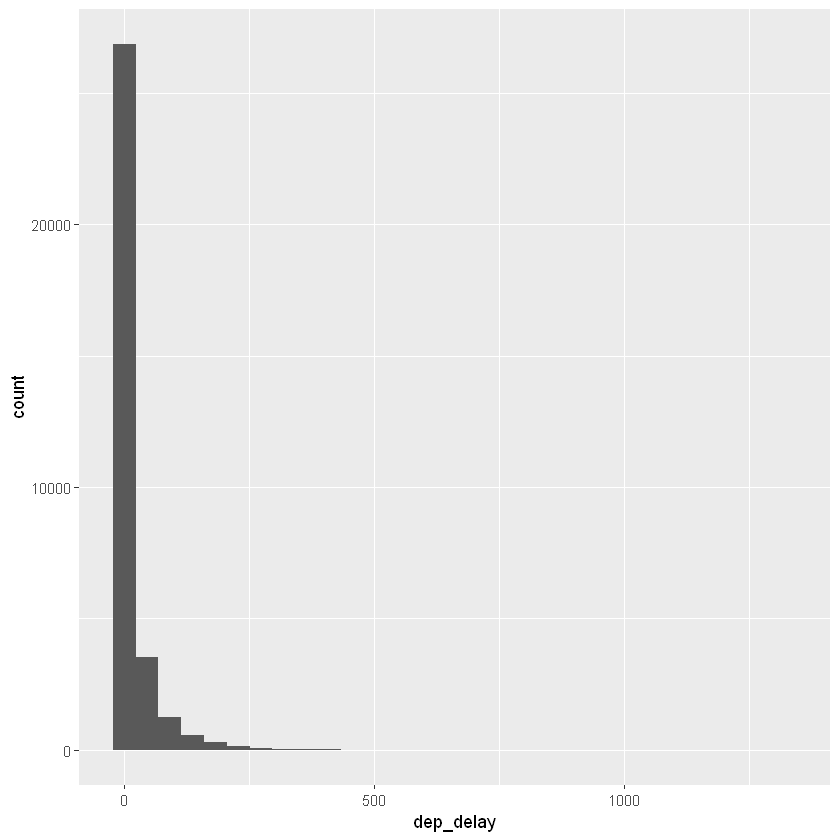

In [5]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram()

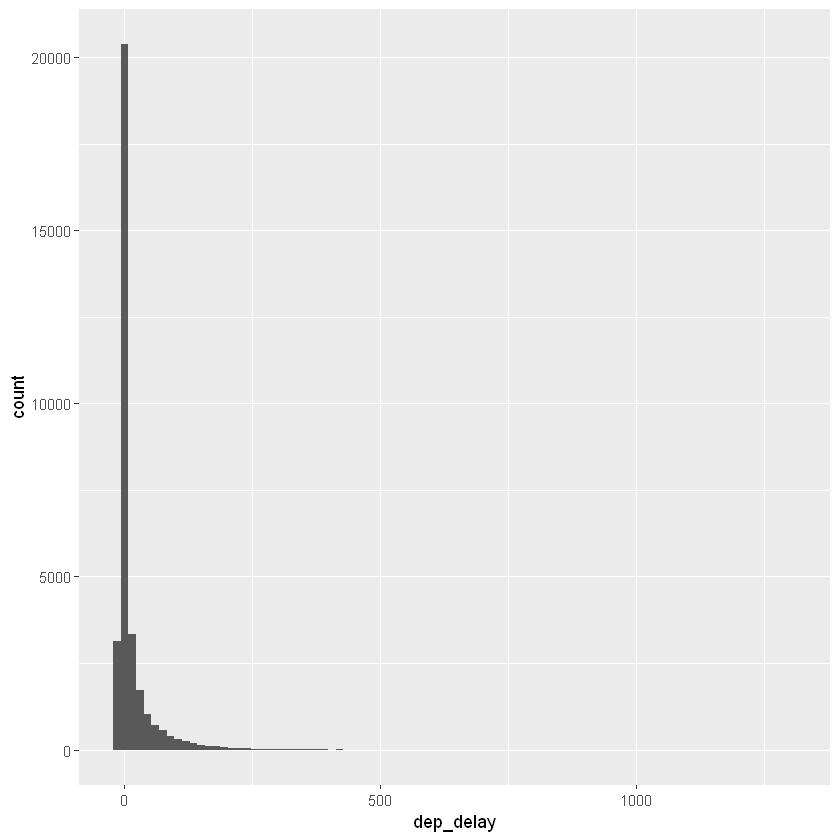

In [6]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)

# Alternative:
# qplot(x = dep_delay, data = nycflights, geom = "histogram", binwidth = 15)

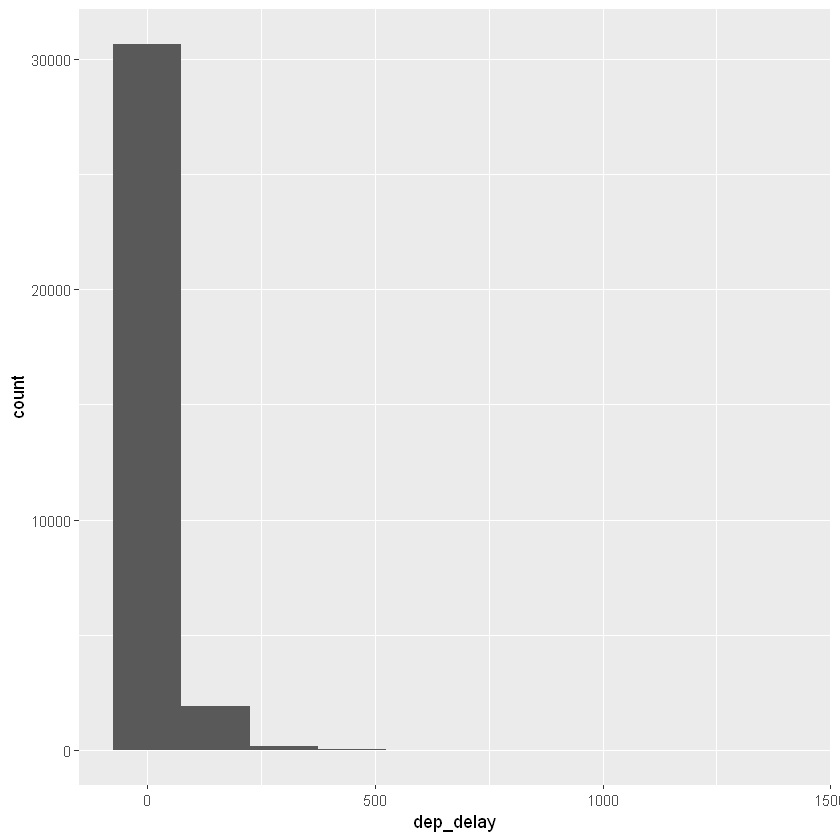

In [7]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)

If we want to focus on departure delays of flights headed to RDU only, we need to first `filter` the data for flights headed to RDU (`dest == "RDU"`) and then make a histogram of only departure delays of only those flights.

In [8]:
rdu_flights <- nycflights %>% filter(dest == "RDU")
head(rdu_flights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,20,1729,23,1903,15,EV,N27962,5977,EWR,RDU,68,416,17,29
2013,5,5,1503,13,1650,15,MQ,N827MQ,4403,JFK,RDU,76,427,15,3
2013,11,10,1907,7,2053,13,MQ,N857MQ,3591,LGA,RDU,68,431,19,7
2013,3,3,1505,15,1641,1,MQ,N835MQ,4403,JFK,RDU,68,427,15,5
2013,10,25,749,-6,916,-19,MQ,N821MQ,3363,JFK,RDU,68,427,7,49
2013,12,10,1521,26,1801,71,MQ,N845MQ,3359,JFK,RDU,108,427,15,21


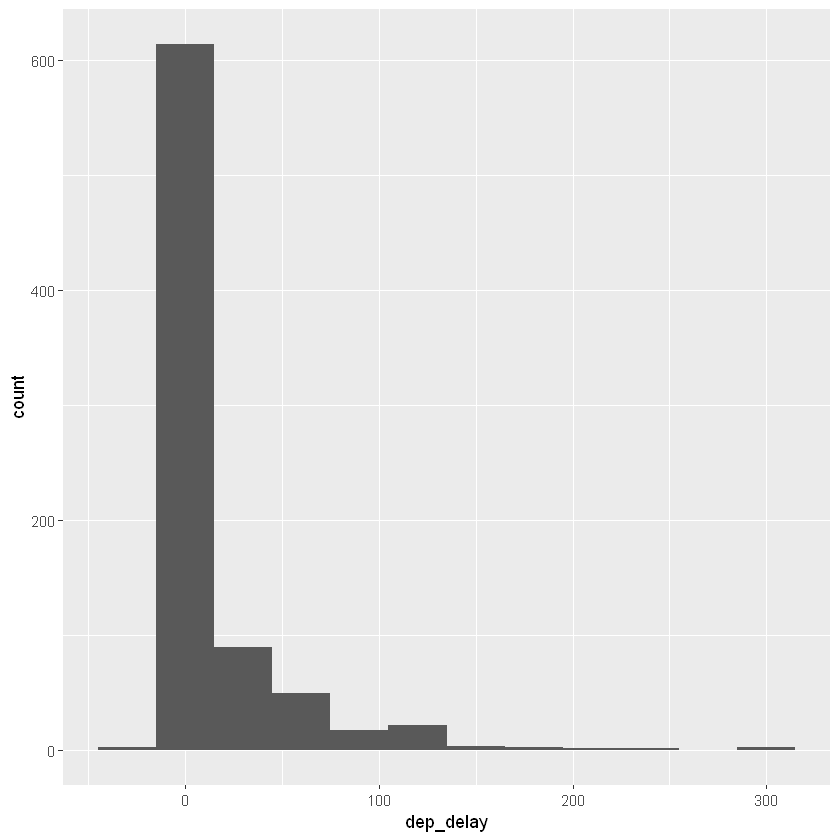

In [9]:
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 30)

We can also obtain numerical summaries for these flights:

In [10]:
mean(rdu_flights$dep_delay)

[1] 11.69913

In [11]:
sd(rdu_flights$dep_delay)

[1] 35.55567

In [12]:
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
<dbl>,<dbl>,<int>
11.69913,35.55567,801


**1) Create a new data frame that includes flights headed to SFO in February, and save this data frame assfo_feb_flights. How many flights meet these criteria?**

In [13]:
sfo_feb_flights <- nycflights %>% filter(dest == "SFO", month == 2)
head(sfo_feb_flights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,2,18,1527,57,1903,48,DL,N711ZX,1322,JFK,SFO,358,2586,15,27
2013,2,3,613,14,1008,38,UA,N502UA,691,JFK,SFO,367,2586,6,13
2013,2,15,955,-5,1313,-28,DL,N717TW,1765,JFK,SFO,338,2586,9,55
2013,2,18,1928,15,2239,-6,UA,N24212,1214,EWR,SFO,353,2565,19,28
2013,2,24,1340,2,1644,-21,UA,N76269,1111,EWR,SFO,341,2565,13,40
2013,2,25,1415,-10,1737,-13,UA,N532UA,394,JFK,SFO,355,2586,14,15


In [14]:
nrow(sfo_feb_flights)

[1] 68

**2) Make a histogram and calculate appropriate summary statistics for arrival delays of sfo_feb_flights. Which of the following is false?**

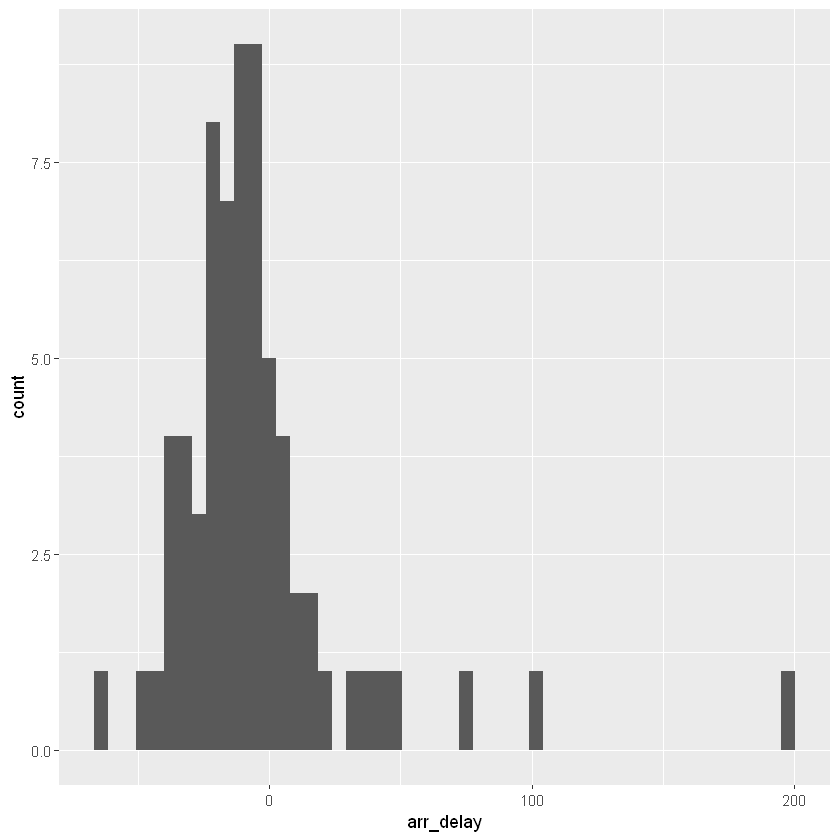

In [15]:
ggplot(data = sfo_feb_flights, mapping = aes(x = arr_delay)) +
        geom_histogram(bins = 50)

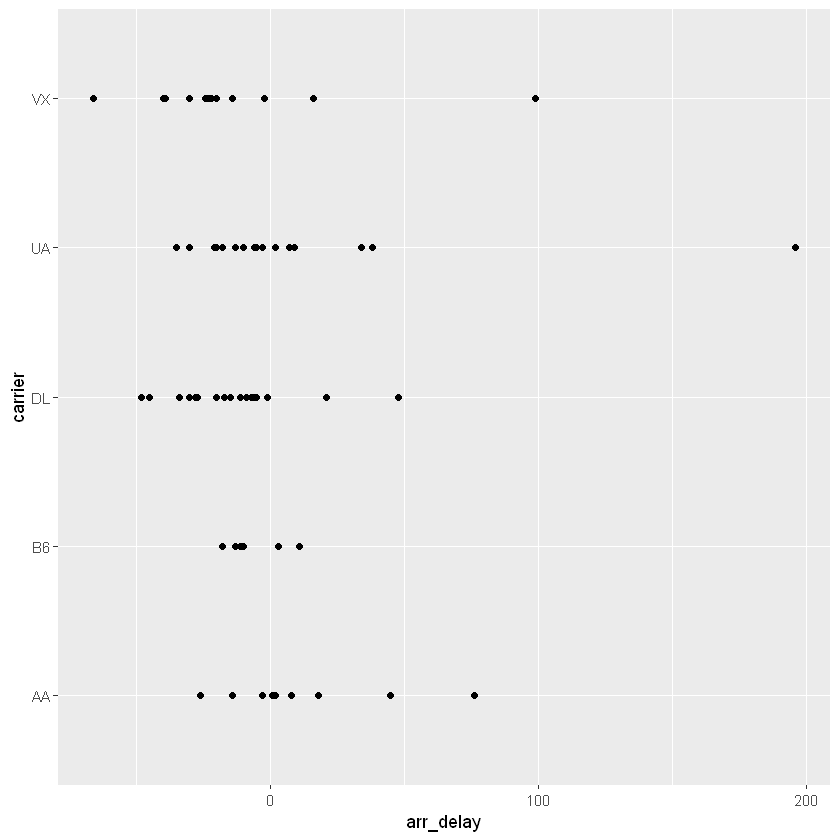

In [16]:
ggplot(data = sfo_feb_flights, mapping = aes(x = arr_delay, y = carrier)) +
        geom_point()

In [17]:
summary(sfo_feb_flights$arr_delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -66.00  -21.25  -11.00   -4.50    2.00  196.00 

Half of the february flights to SFO arrived more than 11 minutes earlier. 

**3) Calculate the median and interquartile range for arr_delays of flights in the sfo_feb_flights data frame, grouped by carrier. Which carrier has the highest IQR of arrival delays?**

In [18]:
sfo_feb_flights %>%
  group_by(carrier) %>%
  summarise(median_ad = median(arr_delay), IQR_ad = IQR(arr_delay), n = n())

# Alternative:
# by_carrier_sfo_feb_flights <- group_by(sfo_feb_flights, carrier)
# summarise(by_carrier_sfo_feb_flights, Median = median(arr_delay), IQR = IQR(arr_delay))

`summarise()` ungrouping output (override with `.groups` argument)



carrier,median_ad,IQR_ad,n
<chr>,<dbl>,<dbl>,<int>
AA,5.0,17.50,10
B6,-10.5,12.25,6
DL,-15.0,22.00,19
UA,-10.0,22.00,21
VX,-22.5,21.25,12


United Airlines (UA) and Delta Airlines (DL) have the bigges interquartile rage for arr_delays of flights the sfo_feb_flights data frame.

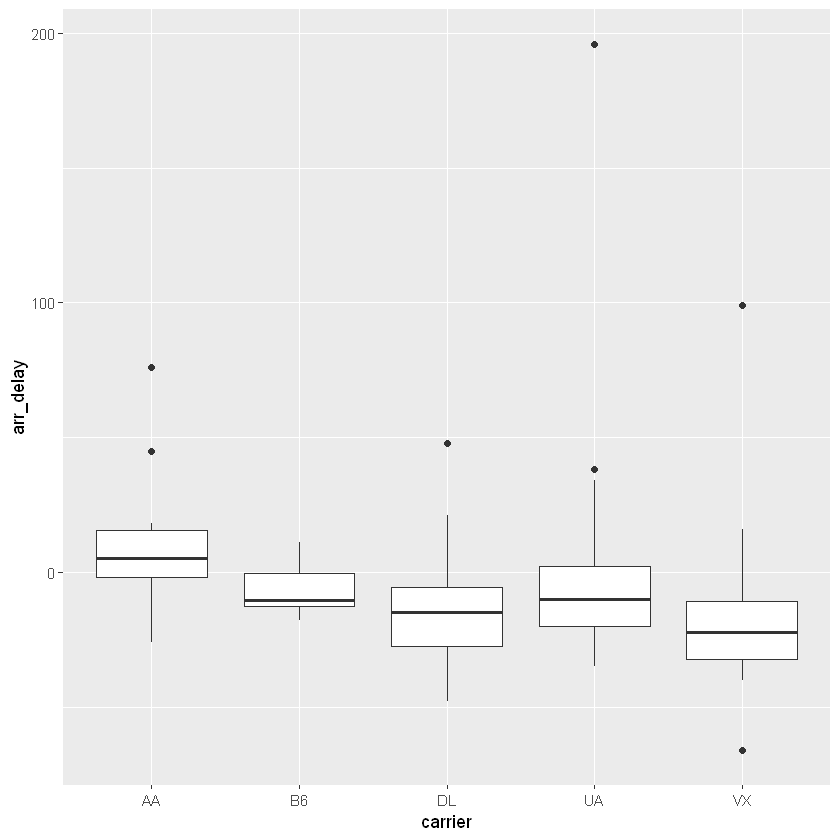

In [19]:
ggplot(data = sfo_feb_flights, mapping = aes(x = carrier, y = arr_delay)) +
        geom_boxplot()

There are big differences of the arrival times by carrier. American Airlines (AA) as the carrier with the worst and Virgin America (VX) with the best arrival times. There are three cases where the arrival time is later than one hour.

**4) Considering the data from all the NYC airports, which month has the highest average departure delay?**

In [20]:
by_month <- group_by(nycflights, month)

dep_delay_by_month <- summarise(by_month, 
                                Mean = round(mean(dep_delay), digits = 2), 
                                Median = round(median(dep_delay), digits = 2),
                                IQR = IQR(dep_delay),
                                Max = max(dep_delay))

arrange(dep_delay_by_month, desc(Mean))

`summarise()` ungrouping output (override with `.groups` argument)



month,Mean,Median,IQR,Max
<int>,<dbl>,<dbl>,<dbl>,<dbl>
7,20.75,0,26,392
6,20.35,0,25,803
12,17.37,1,25,849
4,14.55,-2,16,427
3,13.52,-1,17,393
5,13.26,-1,19,351
8,12.62,-1,15,436
2,10.69,-2,15,319
1,10.23,-2,12,1301


July, followed tightly by June is the month with the highest average delay of flights departing from an NYC airport. A high average mean of delay has also observed in December, suggesting that the problem lies in the number of flights during the Holidays. The months with the lowest average of departure delays are September to November.

**5) Which month has the highest median departure delay from an NYC airport?**

In [21]:
arrange(dep_delay_by_month, desc(Median))

month,Mean,Median,IQR,Max
<int>,<dbl>,<dbl>,<dbl>,<dbl>
12,17.37,1,25,849
6,20.35,0,25,803
7,20.75,0,26,392
3,13.52,-1,17,393
5,13.26,-1,19,351
8,12.62,-1,15,436
1,10.23,-2,12,1301
2,10.69,-2,15,319
4,14.55,-2,16,427


Answer: December.

**6) Is the mean or the median a more reliable measure for deciding which month(s) to avoid flying if you really dislike delayed flights, and why?**

Median would be more reliable as the distribuction of delays is skewed.

**7) If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?**

First classify each flight as “on time” or “delayed”. Less than 5 minutes is basically “on time”. You consider any flight delayed for 5 minutes or of more to be “delayed”.

In [22]:
nycflightsOT <- nycflights %>% 
        mutate(ontime = dep_delay < 5)

Then group flights by origin airport.

In [23]:
nycflightsOT %>% 
        group_by(origin) %>%
        summarise(ontime_prop = sum(ontime == TRUE) / n()) %>%
        arrange(desc(ontime_prop))

`summarise()` ungrouping output (override with `.groups` argument)



origin,ontime_prop
<chr>,<dbl>
LGA,0.7279229
JFK,0.6935854
EWR,0.6369892


LGA: 73% chance in time; JFK 69% chance in time; EWR 64% chance in time.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ontime' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

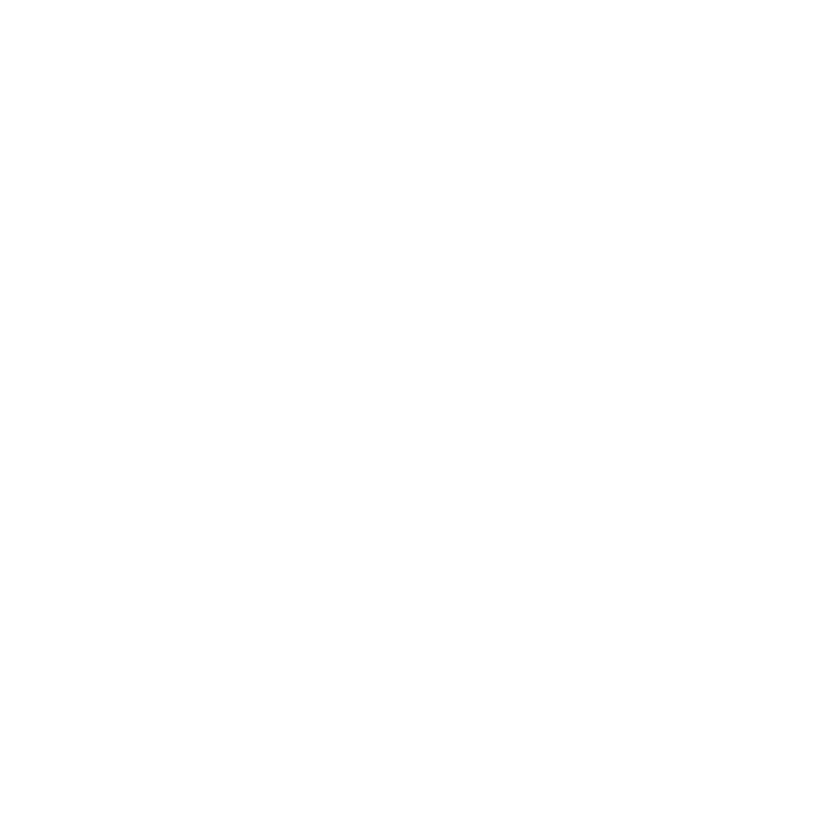

In [24]:
ggplot(nycflights, aes(x = origin, fill = ontime)) +
        geom_bar()

# Alternative:
# qplot(x = origin, fill = dep_type, data = nycflights, geom = "bar")

**8) Mutate the data frame so that it includes a new variable that contains the average speed, avg_speed traveled by the plane for each journey (in mph). What is the tail number of the plane with the fastest avg_speed?** Hint: Average speed can be calculated as distance divided by number of hours of travel, and note that air_time is given in minutes. If you just want to show the avg_speed and tailnum and none of the other variables, use the select function at the end of your pipe to select just these two variables with select(avg_speed, tailnum). You can google this tail number to find out more about the aircraft.

In [25]:
nycflights <- nycflights %>%
        mutate(avg_speed = distance / (air_time / 60))

In [26]:
head(arrange(nycflights, desc(avg_speed)))

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,5,25,1709,9,1923,-14,DL,N666DN,1499,LGA,ATL,65,762,17,9,703.3846
2013,2,21,2355,-3,412,-26,B6,N779JB,707,JFK,SJU,172,1598,23,55,557.4419
2013,11,16,2349,-10,402,-38,B6,N571JB,1503,JFK,SJU,173,1598,23,49,554.2197
2013,2,22,831,4,1258,-18,B6,N568JB,403,JFK,SJU,175,1598,8,31,547.8857
2013,12,5,1628,-2,2045,-45,AA,N5EHAA,95,JFK,SJU,175,1598,16,28,547.8857
2013,3,9,2214,79,229,43,B6,N656JB,701,JFK,SJU,175,1598,22,14,547.8857


Answer: N666DN

**9) Make a scatterplot of avg_speed vs. distance. Which of the following is true about the relationship between average speed and distance.**

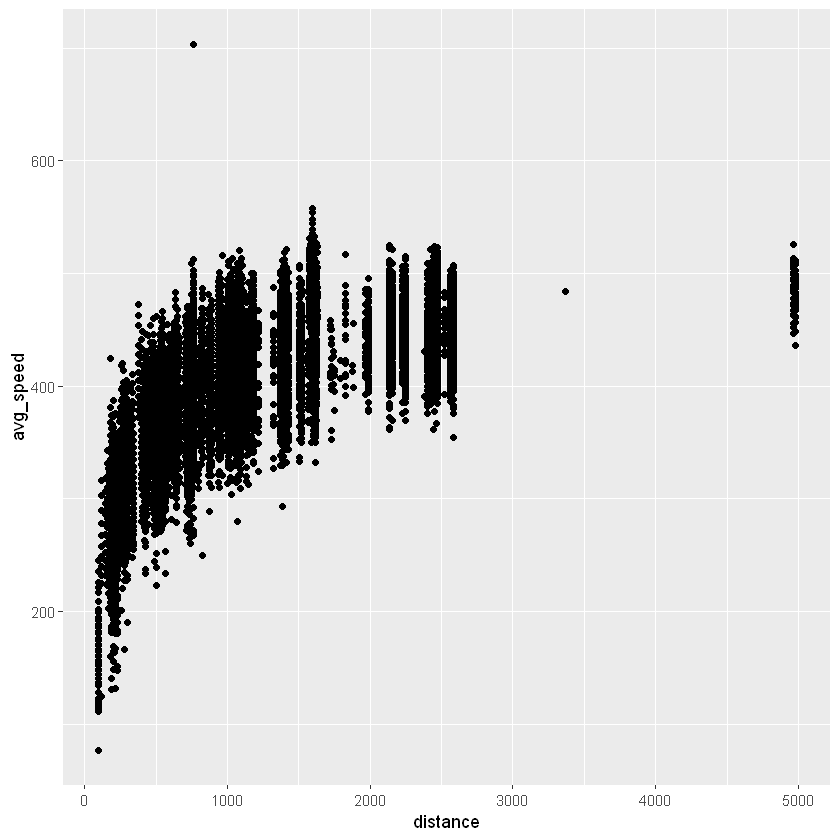

In [27]:
ggplot(nycflights, aes(distance, avg_speed )) +
        # xlim(0, 2800) +
        # ylim(0, 600) +
        geom_point()

The speed range grows slightly with the distance. The reason could be that with longer distances the start and landing time does not count so heavy as with short distances. There is one execeptional fast flight from LaGuardia to Atlanta. The very far flight distances (the points on the 5.000 miles distance rage) are FROM NYC to Honolulu (HNL), the shortest to Philadelphia (PHL).

**10)Suppose you define a flight to be "on time" if it gets to the destination on time or earlier than expected, regardless of any departure delays. Mutate the data frame to create a new variable called `arr_type` with levels `"on time"` and `"delayed"` based on this definition. Then, determine the on time arrival percentage based on whether the flight departed on time or not. What proportion of flights  that were `"delayed"` departing arrive `"on time"`?**

In [28]:
nycflights10 <- nycflights %>% mutate(dep_type = ifelse(dep_delay <= 0, "on time", "delayed"))

nycflights10 <- nycflights10 %>% mutate(arr_type = ifelse(arr_delay <= 0, "on time", "delayed"))

nycflights10 %>% summarize(depd_arrot = sum(dep_type == "delayed" && arr_type == "on time") / sum(dep_type == "delayed"))

depd_arrot
<dbl>
7.81311e-05
